In [2]:
from pathlib import Path
import os
import numpy as np
import numpy.matlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

Load MLP result

In [41]:
filePath_mlp = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_MLP_7d_with_lagging_colab.pickle')
with open(filePath_mlp, 'rb') as f:
     rez_mlp_7d = pickle.load(f)

mlp_train_rmse = rez_mlp_7d['train']['rmse']['US']
mlp_val_rmse = rez_mlp_7d['validation']['rmse']['US']
mlp_test_rmse = rez_mlp_7d['test']['rmse']['US']

Load LSTM result

In [33]:
filePath_lstm = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_LSTM_7d_with_lagging_shorter_test_period_colab.pickle')
with open(filePath_lstm, 'rb') as f:
     rez_LSTM_7d = pickle.load(f)

lstm_train_rmse = rez_LSTM_7d['train']['rmse']['US']        
lstm_val_rmse = rez_LSTM_7d['validation']['rmse']['US']
lstm_test_rmse = rez_LSTM_7d['test']['rmse']['US']

Load SARIMAX result

In [35]:
filePath_srm = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_country_srm_7d_with_lagging.pickle')
with open(filePath_srm, 'rb') as f:
     rez_sarimax_7d = pickle.load(f)

sarimax_train_rmse = rez_sarimax_7d['train']['US']['rmse']
sarimax_val_rmse = rez_sarimax_7d['validation']['US']['rmse']
sarimax_test_rmse = rez_sarimax_7d['test']['US']['rmse']

Load XGBoost result

In [101]:
filePath_xgbr = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_country_xgbr_7d_with_lagging.pickle')
with open(filePath_xgbr, 'rb') as f:
     rez_xgbr_7d = pickle.load(f)

xgbr_train_rmse = rez_xgbr_7d['train']['US']['rmse']        
xgbr_val_rmse = rez_xgbr_7d['validation']['US']['rmse']
xgbr_test_rmse = rez_xgbr_7d['test']['US']['rmse']

Plot model performance (RMSE) on train sets

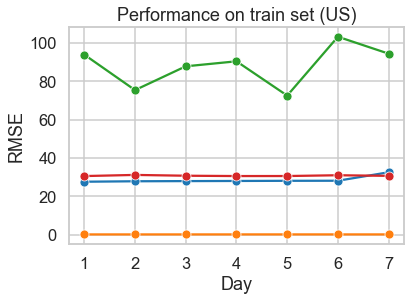

In [142]:
rmse_list = [sarimax_train_rmse, xgbr_train_rmse, mlp_train_rmse, lstm_train_rmse]
model_list = ['SARIMAX', 'XGBoost', 'MLP', 'LSTM']
lineplot_7d_rmse(rmse_list, model_list, "Performance on train set (US)")

Plot model performance (RMSE) on validation sets

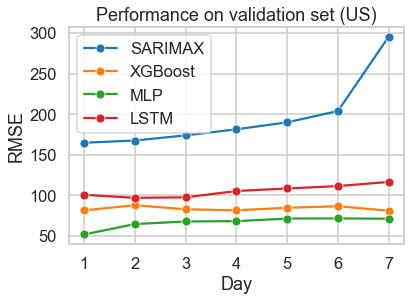

In [139]:
rmse_list = [sarimax_val_rmse, xgbr_val_rmse, mlp_val_rmse, lstm_val_rmse]
model_list = ['SARIMAX', 'XGBoost', 'MLP', 'LSTM']
lineplot_7d_rmse(rmse_list, model_list, "Performance on validation set (US)")

Plot model performance (RMSE) on test sets

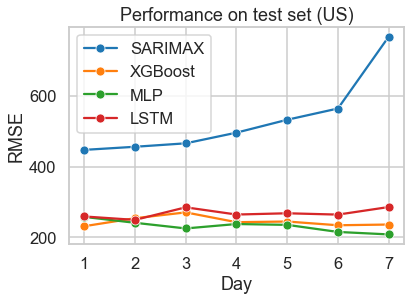

In [138]:
rmse_list = [sarimax_test_rmse, xgbr_test_rmse, mlp_test_rmse, lstm_test_rmse]
model_list = ['SARIMAX', 'XGBoost', 'MLP', 'LSTM']
lineplot_7d_rmse(rmse_list, model_list, "Performance on test set (US)")

In [141]:
def lineplot_7d_rmse(rmse_list, model_list, title):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    df = pd.DataFrame()
    for i in range(len(rmse_list)):
        df[model_list[i]] = rmse_list[i]
    df.index = np.arange(1,8,1)
    
    for i in range(len(rmse_list)):
        g = sns.lineplot(data=df, x=df.index, y=model_list[i], legend=False, label=model_list[i], marker='o') #markers=['o' for _ in range(len(rmse_list))])
        g.set_xticks(df.index)
        g.set_xlabel("Day")
        g.set_ylabel("RMSE")
        g.set_title(title)
        #g.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)